In [144]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns

In [145]:
df = pd.read_csv('portland_bus_ride.csv')
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [146]:
df.columns = ['month', 'monthly_ridership']
df.head()

,month,monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [27]:
df.monthly_ridership.unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', ' n=114'], dtype=object)

In [164]:
df = df.drop(df.index[df['monthly_ridership'] == ' n=114'])
df.monthly_ridership.unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327'], dtype=object)

In [165]:
df.monthly_ridership = df.monthly_ridership.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              114 non-null    object
 1   monthly_ridership  114 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 2.2+ KB


In [178]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['month'].dtypes

dtype('<M8[ns]')

In [37]:
df.set_index(df['month'], inplace=True)
df.head()

,month,monthly_ridership
month,,
1960-01-01,1960-01-01,648
1960-02-01,1960-02-01,646
1960-03-01,1960-03-01,639
1960-04-01,1960-04-01,654
1960-05-01,1960-05-01,630


In [38]:
df = df.drop(['month'], axis=1)
df.head()

,monthly_ridership
month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


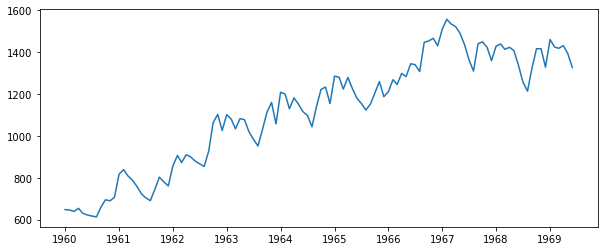

In [43]:
# visualize the data
plt.rc('figure', figsize=(10,4))
plt.plot(df.monthly_ridership)

<AxesSubplot:title={'center':'lag 4 differencing'}, xlabel='month'>

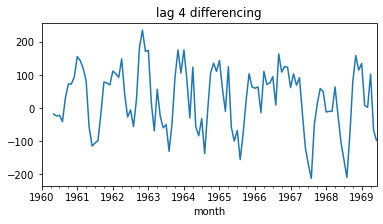

In [47]:
# apply quarterly differencing 
df.monthly_ridership.diff(periods=4).plot(title='lag 4 differencing', figsize=(6,3))

<AxesSubplot:title={'center':'lag 12 differencing'}, xlabel='month'>

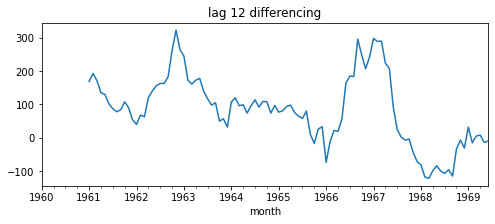

In [48]:
# apply annual differencing 
plt.rc('figure', figsize=(8,3))
df.monthly_ridership.diff(periods=12).plot(title='lag 12 differencing')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

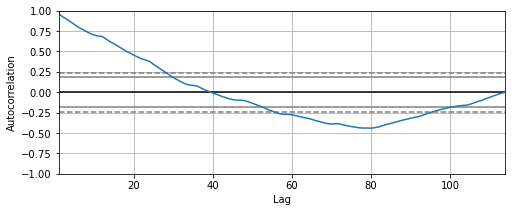

In [49]:
pd.plotting.autocorrelation_plot(df.monthly_ridership)

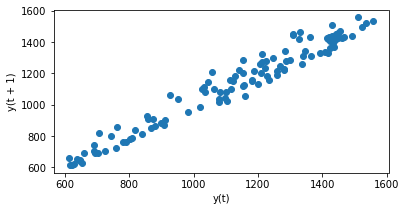

In [59]:
plt.rc('figure', figsize=(6,3))
pd.plotting.lag_plot(df.monthly_ridership)
plt.show()

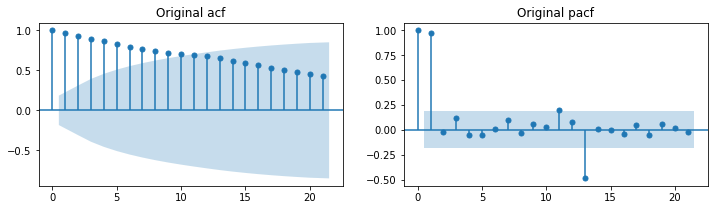

In [190]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
acf = sm.tsa.graphics.plot_acf(df.monthly_ridership, ax=axes[0], title='Original acf')
pacf = sm.tsa.graphics.plot_pacf(df.monthly_ridership, ax=axes[1], title='Original pacf')

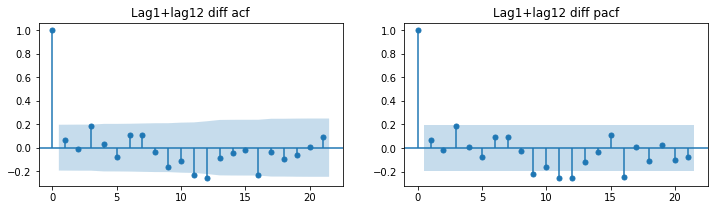

In [191]:
plt.rc('figure', figsize=(12,3))
fig, axes = plt.subplots(1,2)
acf_lag12_lag1 = sm.tsa.graphics.plot_acf(df.monthly_ridership.diff(periods=12).diff().dropna(), ax=axes[0], title='Lag1+lag12 diff acf')
pacf_lag12_lag1 = sm.tsa.graphics.plot_pacf(df.monthly_ridership.diff(periods=12).diff().dropna(), ax=axes[1], title='Lag1+lag12 diff pacf')

In [88]:
mod = sm.tsa.statespace.SARIMAX(df.monthly_ridership, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

C:\Users\augus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\augus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
                                      SARIMAX Results                                       
Dep. Variable:                    monthly_ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -501.340
Date:                              Tue, 05 Jan 2021   AIC                           1008.680
Time:                                      17:23:45   BIC                           1016.526
Sample:                                  01-01-1960   HQIC                          1011.856


<AxesSubplot:xlabel='month'>

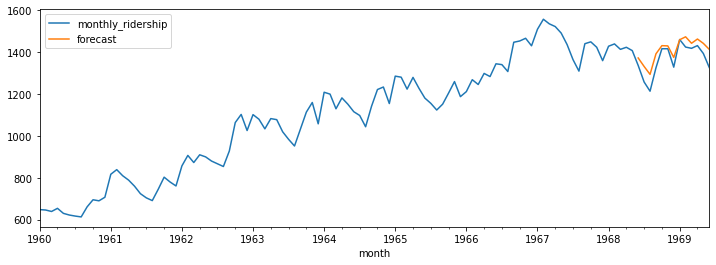

In [74]:
df['forecast'] = results.predict(start='1968-06-01', dynamic=True)
df[['monthly_ridership', 'forecast']].plot(figsize=(12,4))

In [122]:
forecast = results.predict(start='1969-07-01', end='1973-07-01', dynamic=F)
forecast.head(10)

1969-07-01    1280.228895
1969-08-01    1245.410996
1969-09-01    1338.884629
1969-10-01    1409.617511
1969-11-01    1416.994735
1969-12-01    1350.887649
1970-01-01    1460.475432
1970-02-01    1454.739674
1970-03-01    1432.662110
1970-04-01    1453.188708
Freq: MS, Name: predicted_mean, dtype: float64

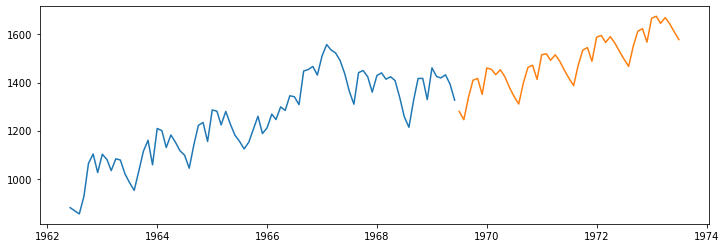

In [135]:
plt.rc('figure', figsize=(12, 4))
plt.plot(df.monthly_ridership.loc['1962-06-01':])
plt.plot(forecast)

In [139]:
train = df.monthly_ridership[:'1967-12-01']
test = df.monthly_ridership['1968-01-01':]

In [140]:
test

month
1968-01-01    1429
1968-02-01    1440
1968-03-01    1414
1968-04-01    1424
1968-05-01    1408
1968-06-01    1337
1968-07-01    1258
1968-08-01    1214
1968-09-01    1326
1968-10-01    1417
1968-11-01    1417
1968-12-01    1329
1969-01-01    1461
1969-02-01    1425
1969-03-01    1419
1969-04-01    1432
1969-05-01    1394
1969-06-01    1327
Name: monthly_ridership, dtype: int32

In [141]:
mod2 = sm.tsa.statespace.SARIMAX(train, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results2 = mod2.fit()
results2.summary()

C:\Users\augus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\augus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                    monthly_ridership   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -415.380
Date:                              Tue, 05 Jan 2021   AIC                            836.760
Time:                                      20:48:09   BIC                            844.016
Sample:                                  01-01-1960   HQIC                           839.675
                                       - 12-01-1967                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3058      0.220      1.392      0.164      -0.125       0.736
ma.S.L12      -0.9981     31.900     -0.031      0.975     -63.522      61.526
sigma2      1043.1592   3.31e+04      0.032      0.975   -6.38e+04    6.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.56
Prob(Q):                              0.94   Prob(JB):                         0.17
Heteroskedasticity (H):               2.22   Skew:                             0.35
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

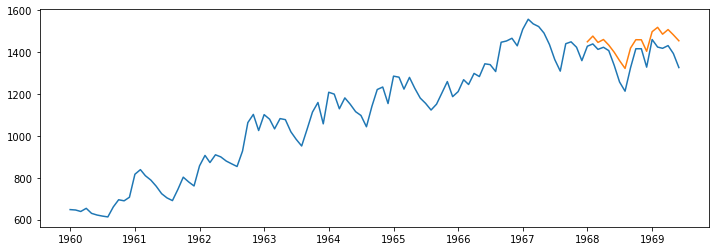

In [143]:
forecast2 = results2.predict(start='1968-01-01', end='1969-06-01', dynamic=True)
plt.plot(df.monthly_ridership)
plt.plot(forecast2)